In [1]:
import os
import cv2

import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import tensorflow as tf
import keras 

from keras.models  import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D

In [2]:
path1 = 'E:\Face_Recognition'
face = ['WithoutMask' , 'WithMask']

In [3]:
for i in face:
    folders = os.path.join(path1 , i)
    print(folders)

E:\Face_Recognition\WithoutMask
E:\Face_Recognition\WithMask


In [4]:
for i in face:
    folders = os.path.join(path1 , i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        print(image_path)

E:\Face_Recognition\WithoutMask\10.png
E:\Face_Recognition\WithoutMask\100.png
E:\Face_Recognition\WithoutMask\1004.png
E:\Face_Recognition\WithoutMask\1005.png
E:\Face_Recognition\WithoutMask\1006.png
E:\Face_Recognition\WithoutMask\1007.png
E:\Face_Recognition\WithoutMask\1008.png
E:\Face_Recognition\WithoutMask\1009.png
E:\Face_Recognition\WithoutMask\101.png
E:\Face_Recognition\WithoutMask\1010.png
E:\Face_Recognition\WithoutMask\1011.png
E:\Face_Recognition\WithoutMask\1012.png
E:\Face_Recognition\WithoutMask\1013.png
E:\Face_Recognition\WithoutMask\1018.png
E:\Face_Recognition\WithoutMask\1019.png
E:\Face_Recognition\WithoutMask\102.png
E:\Face_Recognition\WithoutMask\1020.png
E:\Face_Recognition\WithoutMask\1021.png
E:\Face_Recognition\WithoutMask\1022.png
E:\Face_Recognition\WithoutMask\1023.png
E:\Face_Recognition\WithoutMask\1024.png
E:\Face_Recognition\WithoutMask\1025.png
E:\Face_Recognition\WithoutMask\1026.png
E:\Face_Recognition\WithoutMask\1027.png
E:\Face_Recognition\W

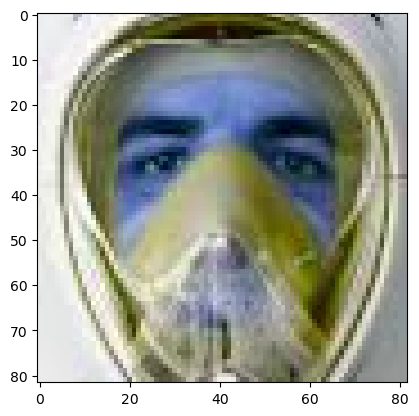

In [5]:
for i in face:
    folders = os.path.join(path1 , i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break
# just to show image

In [6]:
image_size = 200
path1 = 'E:\Face_Recognition'
face = ['WithoutMask' , 'WithMask']

input_image = []
for i in face:
    folders = os.path.join(path1 , i)
    label = face.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size , image_size))
        input_image.append([image_array , label])

In [7]:
len(input_image)

4000

In [8]:
np.random.shuffle(input_image)

In [9]:
X = []
Y = []

for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [10]:
X = np.array(X)
Y = np.array(Y)

In [11]:
X_train = X[0 : 3200]
Y_train = Y[0 : 3200]


X_test = X[3200 : 4000]
Y_test = Y[3200:  4000]

In [12]:
len(Y_test)

800

In [13]:
X_train = X_train/ 255
X_test  = X_test / 255

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128 , activation='relu' , input_shape = X.shape[1:]))# Dense layer
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
adam = tf.keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train,Y_train , epochs=5 , validation_split=.1 )

Epoch 1/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 62s 621ms/step - accuracy: 0.7497 - loss: 1.2275 - val_accuracy: 0.8906 - val_loss: 0.2462
Epoch 2/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 56s 616ms/step - accuracy: 0.9500 - loss: 0.1337 - val_accuracy: 0.9812 - val_loss: 0.0497
Epoch 3/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 55s 612ms/step - accuracy: 0.9812 - loss: 0.0551 - val_accuracy: 0.9781 - val_loss: 0.0584
Epoch 4/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 47s 527ms/step - accuracy: 0.9880 - loss: 0.0402 - val_accuracy: 0.9594 - val_loss: 0.0878
Epoch 5/5
90/90 ━━━━━━━━━━━━━━━━━━━━ 52s 576ms/step - accuracy: 0.9845 - loss: 0.0423 - val_accuracy: 0.9812 - val_loss: 0.0534


In [17]:
pred = model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step


In [18]:
pred_classes = pred.argmax(axis = 1)

In [19]:
from sklearn.metrics import confusion_matrix ,accuracy_score, recall_score , precision_score ,f1_score,classification_report

In [20]:
confusion_matrix(Y_test,pred_classes)

array([[368,  20],
       [  3, 409]], dtype=int64)

In [21]:
print(classification_report(Y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       388
           1       0.95      0.99      0.97       412

    accuracy                           0.97       800
   macro avg       0.97      0.97      0.97       800
weighted avg       0.97      0.97      0.97       800



In [30]:
model.save("WithoutMask_WithMask.h5")

In [31]:
from keras.models import load_model

In [32]:
load = load_model("WithoutMask_WithMask.h5")

In [33]:
load.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step


array([[9.9603194e-01, 3.9680782e-03],
       [2.7722921e-04, 9.9972278e-01],
       [9.9993265e-01, 6.7326495e-05],
       ...,
       [1.3002564e-01, 8.6997437e-01],
       [9.9444711e-01, 5.5528386e-03],
       [9.9759007e-01, 2.4099904e-03]], dtype=float32)

In [34]:
confusion_matrix(Y_test,pred_classes)

array([[405,   2],
       [ 14, 379]], dtype=int64)

In [36]:
pwd

'C:\\Users\\Dell\\Neural_Networks'